#                                   #  College Admission Prediction

## Objective

- Given certain metrics of a student, our task is to predict the probability of the student getting accepted into graduate programs. 
- We will use a random forest to accomplish this task.

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

## Importing the necessary data and loading the data

In [2]:
# Loading the dataset
df = pd.read_csv('admission_predict.csv')

## Exploring the dataset

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(500, 9)

In [4]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Breakdown of Attributes and their interpretations

- The dataset contains 500 observations with the following variables:
- GRE Score - Out of 340
- TOEFL Score - Out of 120
- University Rating - Between 1 to 5 (5 being the best)
- SOP - Between 1 to 5 (5 being the best)
- LOR - Between 1 to 5 (5 being the best)
- CGPA - Out of 10
- Research - 1 if student has research experience, else 0
- Chance of Admit - Probability of getting accepted into graduate program



In [5]:
# Returns the first x number of rows when tail(num). Without a number it returns 5
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
# Returns an object with all of the column headers
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Performing Calculations

In [11]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [12]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
# Returns true for a column having null values, else false
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [14]:
# Renaming the columns with appropriate names
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Visulaisation

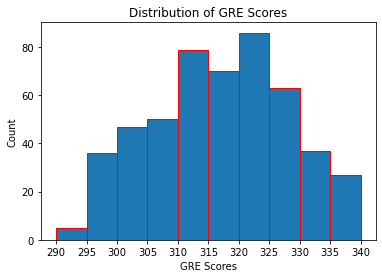

In [35]:
# Visualizing the feature GRE

bins= [290,295,300,305,310,315,320,325,330,335,340]
plt.hist(df['GRE'].values, bins=bins, edgecolor="red")
plt.xticks(bins)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Scores')
plt.ylabel('Count')

plt.show()



- We can see the visualisation plot for the GRE score and count of the students who got the scores. Here the highest gre score falls under the range of 320-325and almost 80 students hav got the similar range of scores. 

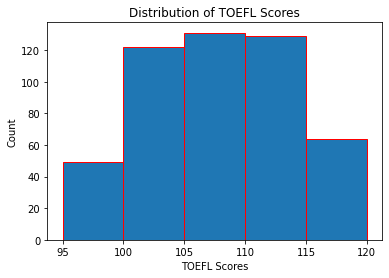

In [36]:
# Visualizing the feature TOEFL

bins= [95,100,105,110,115,120]
plt.hist(df['TOEFL'].values, bins=bins, edgecolor="red")
plt.xticks(bins)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')

plt.show()



- We can see the visualisation plot for the Toefl score and count of the students who got the scores. Here the highest toefl score falls under the range of 105-110 and almost 120 students hav got the similar range of scores. 

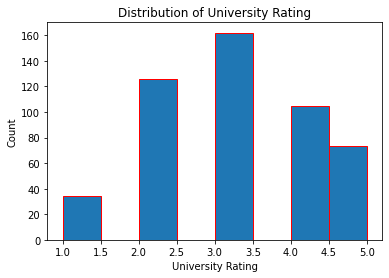

In [31]:
# Visualizing the feature University rating

bins= [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.hist(df['University Rating'].values, bins=bins, edgecolor="red")
plt.xticks(bins)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()


- We can see the visualisation plot for the University rating and count of the students who got the scores. Here the highest University rating falls under the range of 3 - 3.5 and almost 160 students hav got the similar range of scores. 

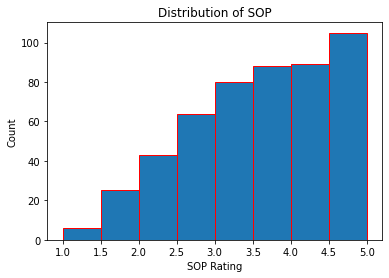

In [32]:
# Visualizing the feature SOP
#fig = plt.hist(df['SOP'], rwidth=0.7)


bins= [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.hist(df['SOP'].values, bins=bins, edgecolor="red")
plt.xticks(bins)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

- We can see the visualisation plot for the SOP and count of the students who got the scores. Here the highest SOP falls under the range of 4.5 - 5.0 and almost 100 students hav got the similar range of scores. 

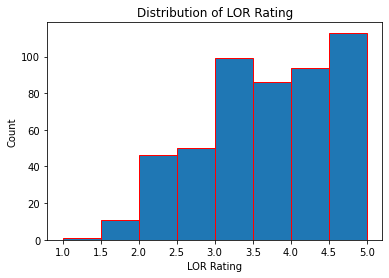

In [33]:
# Visualizing the feature LOR

bins= [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
plt.hist(df['LOR'].values, bins=bins, edgecolor="red")
plt.xticks(bins)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()


- We can see the visualisation plot for the LOR and count of the students who got the scores. Here the highest LOR score falls under the range of  4.5 - 5.0 and almost above 100 students hav got the similar range of scores. 

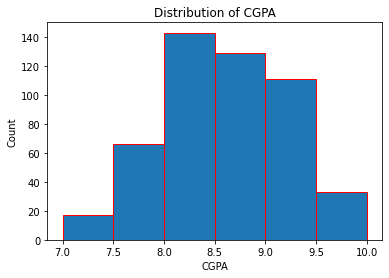

In [34]:
# Visualizing the feature CGPA

bins= [7.0,7.5,8.0,8.5,9.0,9.5,10.0]
plt.hist(df['CGPA'].values, bins=bins, edgecolor="red")
plt.xticks(bins)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

- We can see the visualisation plot for the CGPA and count of the students who got the scores. Here the highest CGPA falls under the range of 8-8.5 and almost 140 students hav got the similar range of scores. 

- So, from the above given visualisation plots analysis of GRE,Toefl, LOR, SOP, University rating Scores, we can say that atleast and around 100 students are getting the maximum good amount of score to get into the best universities.

# Data Cleaning

In [21]:
# Removing the serial no, column
df.drop('Serial No.', axis='columns', inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
# Replacing the 0 values from ['GRE','TOEFL','University Rating','SOP','LOR','CGPA'] by NaN
df_copy = df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']] = df_copy[['GRE','TOEFL','University Rating','SOP','LOR','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

# Analyzing the Attributes

- Next, we take a look at the correlation between the predictor variables and the output variable. We will pay attention to the correlation amongst the predictor variables, because we do not want highly correlated predictor variables.

<AxesSubplot:>

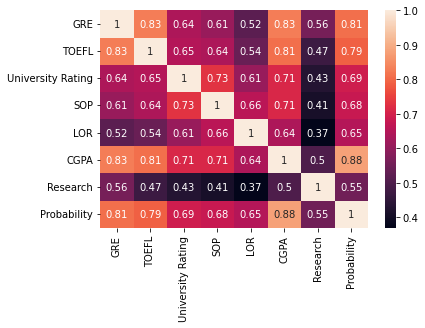

In [23]:
correlation_matrix = df.iloc[:,:].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

- All predictor variables are significantly correlated to Chance of Admit. As a result, we will use all of them to build our model. Amongst the predictor variables themselves, three variables show a strong correlation - TOEFL Score, GRE Score, and GPA. All three metrics are based on academic performance, so it makes sense for them to be correlated.

- Note that the Research variable was automatically excluded in the chart above because we converted it to a categorical variable. It is impossible to calculate the correlation for categorical variables. Hence we will look at a different plot to get a feel for how research is distributed. 

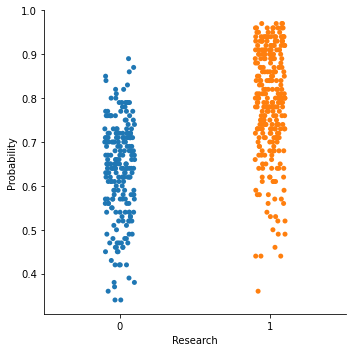

In [24]:
sns.catplot(data = df, x = "Research", y = "Probability")


- The Chance of Admit variable is centered at around 0.75 for those who have research experience, and is centered at around 0.6 for those who do not. Does this mean that having research experience drops the chance of admission by 0.15? In short, No. We need to keep in mind that our model will account for the variation caused by each one of the predictor variables. We will look at how important each variable is after we fit our model.

In [25]:
X = df.iloc[:,0:7]
y = df.iloc[:,7]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1005)

# Model Breakdown

- After experimenting with variation combinations of parameters, the following had the lowest test mean squared error (MSE) and the highest coefficient of detremination value.

- A quick breakdown of key parameters:
- n_estimators : The number of decision trees that our forest contains - 250
- max_features : This affects the maximum number of features that will be considered at each split. Limiting the number of features to 2 seemed to work best.
- min_samples_split : The minimum number of samples required to split a node. Default is 2, but we set it to 5 in order to generalize better.

In [27]:
rf = RandomForestRegressor(n_estimators=250,
                           max_features=(2/7), 
                           min_samples_split=5, 
                           n_jobs=2, 
                           random_state=1005)

In [28]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2857142857142857, min_samples_split=5,
                      n_estimators=250, n_jobs=2, random_state=1005)

# Model Evaluation Metrics

In [29]:
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

train_mse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_mse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = rf.score(X_train, y_train)
test_r2 = rf.score(X_test, y_test)

print("Train MSE ::", train_mse)
print("Test MSE ::", test_mse)
print("Train R^2 ::", train_r2)
print("Test R^2 ::", test_r2)

Train MSE :: 0.03557638293692653
Test MSE :: 0.05607686326190976
Train R^2 :: 0.9354890423784261
Test R^2 :: 0.8486765591571562


- The Test is 0.849, which means that in general, our model accounts for 84.9% of the variation in Chance of Admit

# Feature Importance

- Next, we take a look at which attributes affect Chance of Admit the most. Essentially, we are trying to find out what factors affect a student's chance of admission.

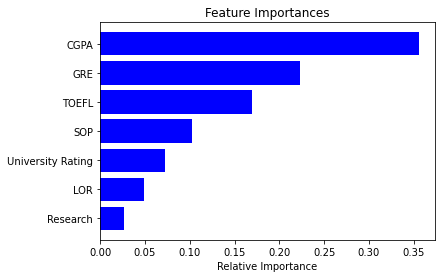

In [30]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- From the above plot, it is clear that CGPA and GRE Score play the biggest roles in affecting the admission decision. Research does not play a very significant role in determining the admission decision. To answer our previous question, lacking research expereince should not adversely affect the admission decision .

# Predicting on a Custom Example


- Let us define the metrics of a new person and take a look at the prediction.

- Need to define the following:
- GRE Score - Out of 340
- TOEFL Score - Out of 120
- University Rating - Between 1 to 5 (5 being the best)
- SOP - Between 1 to 5 (5 being the best)
- LOR - Between 1 to 5 (5 being the best)
- CGPA - Out of 10
- Research - 1 if student has research experience, else 0

In [31]:
newPerson = [[330, 110, 4, 4.5, 4.5, 9.5, 0]]

In [32]:
pred = rf.predict(newPerson)
pred[0]

0.881838936507936

- For the following student:

- GRE Score - 330
- TOEFL Score - 110
- University Rating - 4
- SOP - 4.5
- LOR - 4.5
- CGPA - 9.5
- Research - 0 (No experience)

- The chance of getting accepted into the program is 88.2%

## Conclusion

- From the above analysis from the college admission prediction, we can say that - The chance of getting accepted into the program is 88.2%

## Documentation

- HARDWARE USED:- Lenovo laptop with RAM of 4GB , 1TB storage, 2GB graphics and processor CORE i3 intel.

- SOFTWARE USED: -

- ANACONDA- Anaconda is a free and open-source distribution of the Python (data science, machine learning applications, large-scale data processing, predictive analytics, etc.), that aims to simplify package management and deployment. 

- JUPYTER NOTEBOOK-The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations, and narrative text. Uses include data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. 

- PYTHON VERSION 3.7- Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace.

* PC with2Gb hard disk and 256gb RAM
* Mobile with minimum 4gb RAM
* Minimum 10mb space to download the space
* Internet speed with minimum 200kbps
* Intel core i3 9100F 9th Gen
